**1. 1차원데이터분석**

1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

1.** **공분산/ 상관계수**

2.** **다중공선성확인**

3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

# 항공사 지연요인 데이터 탐색적 분석

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

In [1]:
import pandas as pd

# 1. 변수 탐색

- 수치형/범주형변수

In [2]:
df = pd.read_csv("./data/airline_stats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


범주형 변수 : airline
수치형 변수 : pct_carrier_delay,	pct_atc_delay,	pct_weather_delay

In [4]:
df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [5]:
#수치형변수의 최대/최소/대표값
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [6]:
#범주형 변수의 값목록
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

총 6개 항공사의 데이터를 포함하고 있다.

그중 Delta 가 9107건으로 가장 많고, American, Southwest , United 항공사가 5천건 수준이다.

In [9]:
#항공사별 기술통계 비교
df.groupby('airline')['pct_carrier_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,3.521889,9.042180,6.333460,8.081843,7.521997,7.398833
std,2.483224,4.139067,4.695292,3.797737,3.345085,5.369283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.935484,6.338538,3.813989,5.341176,5.070294,4.034708
50%,3.225806,8.428571,5.548387,7.657895,6.960930,6.445210
75%,4.685599,10.988763,7.821952,10.280000,9.354839,9.633110
max,22.290323,50.000000,100.000000,28.000000,24.800000,100.000000


항공사요인의 경우, 

American 이 평균 9.04%, Jeb Blue 8.08% 순이다.<br>
표준편차가 가장 큰 항공사는 United 로 5.36이다. Delta(4.69) → 고객 경험 일관성에 불리.

In [11]:
df.groupby('airline')['pct_atc_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,5.472672,5.993529,4.462978,7.345231,3.147019,5.348133
std,5.699303,4.647170,4.364335,5.227372,2.513162,4.992464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.878614,3.108403,1.818182,3.784314,1.612527,2.431308
50%,3.776860,4.986523,3.508108,6.136905,2.559242,4.353647
75%,7.001330,7.594450,5.839901,9.612903,3.790421,7.030109
max,54.838710,60.000000,100.000000,40.986111,21.542722,100.000000


atc delay (관제 요인)은 **Jet Blue(7.34%)**가 가장 높음 → 운영 노선에 ATC 병목 구간 많을 수 있음.

In [12]:
df.groupby('airline')['pct_weather_delay'].describe().T

airline,Alaska,American,Delta,Jet Blue,Southwest,United
count,3851.000000,5723.000000,9095.000000,3773.000000,5584.000000,5414.000000
mean,0.513497,1.122920,0.680765,0.465327,0.512611,0.680697
std,1.136494,1.097811,1.093255,0.764147,0.649631,1.338433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.296719,0.000000,0.000000,0.105675,0.000000
50%,0.000000,0.884354,0.316406,0.157312,0.305598,0.263780
75%,0.497395,1.641725,0.893346,0.666667,0.663306,0.861395
max,14.633803,12.500000,20.500000,9.923077,6.240987,33.333333


weather delay (기상 요인)은 전반적으로 낮지만, <br>
American(1.12%), **United(0.68%)**가 상대적으로 높음 → 기상 취약 지역을 자주 운항하는 걸까?
weather delay의 max값: United(33.3%), Delta(20.5%) → 극단적 사례 있음 → 리스크 관리 필요.

max 값이 너무 큰 경우: Delta의 carrier_delay = 100, atc_delay = 100 → 데이터 품질 문제 or 극단적 상황.<br>
이상치 필터링이 필요할 수 있다.

### 항공사별 운항 안정성 분석
전반적으로 평균 지연률이 낮고 표준편차도 적은 항공사라고 볼때,<br>
Alaska: 모든 평균값이 가장 낮음 (carrier: 3.5%, atc: 5.5%, weather: 0.51%), 표준편차도 낮다.(carrier 1.93%) <br>
→ Alaska는 항공기 지연률이 가장 안정적인 항공사로 판단 가능.

### 서비스 개선 방향 도출
American은 모든 지연 평균이 높고 편차도 큼 → 내부 운영 개선 + 기상 대응 전략 필요.
Delta는 weather delay는 평균적이지만, carrier/atc delay가 큼 → 프로세스 개선 + 항로 재배치 고려.

In [13]:
# 결측치 확인
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

각 변수별로 28건의 결측치가 확인되었음.  airline 제외

처리 방안<br>
1. 결측치가 적을 때는 간단한 처리(제거, 평균/중앙값 대체)로 충분
2. 세 열 모두 동일한 28개 행이 결측일 가능성이 높음 → 병합 결측 패턴 확인됨
3. airline은 결측치가 없으므로 그룹화 기반 결측 대체 가능

In [18]:
# 결측치 포함된 행 보기
m_df = df[df.isnull().any(axis=1)]
m_df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
4809,NaN,NaN,NaN,Jet Blue
6123,NaN,NaN,NaN,Jet Blue
7069,NaN,NaN,NaN,Delta
9241,NaN,NaN,NaN,Delta
12081,NaN,NaN,NaN,United


In [19]:
m_df['airline'].value_counts()

airline
Delta       12
United      12
Jet Blue     2
American     2
Name: count, dtype: int64

In [16]:
# 결측치 처리 > 방법 설명
# 1. 제거
df_clean = df.dropna()
#f_clean

In [20]:
#2. 대표값으로 대체
df_filled = df.fillna(df.mean(numeric_only=True))

In [21]:
#3. airline 별 평균으로 대체
df_group_fill = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
  df_group_fill[col] = df.groupby('airline')[col].transform(lambda x:x.fillna(x.mean()))
df_group_fill.isna().sum()

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

In [26]:
#4. 결측치 처리한 데이터의 통계량 비교
d_clean = df_clean.describe().add_prefix('drop_')
d_filled = df_filled.describe().add_prefix('filled_')
d_group = df_group_fill.describe().add_prefix('group_')
d_comp = pd.concat([d_clean, d_filled, d_group], axis=1)
d_comp.T

,count,mean,std,min,25%,50%,75%,max
drop_pct_carrier_delay,33440.0,7.041475,4.497596,0.0,4.145455,6.356893,9.140474,100.000000
drop_pct_atc_delay,33440.0,5.089962,4.718647,0.0,2.146565,3.900000,6.630238,100.000000
drop_pct_weather_delay,33440.0,0.684776,1.073743,0.0,0.000000,0.316002,0.935161,33.333333
filled_pct_carrier_delay,33468.0,7.041475,4.495714,0.0,4.147084,6.359631,9.136141,100.000000
filled_pct_atc_delay,33468.0,5.089962,4.716672,0.0,2.148281,3.903367,6.625000,100.000000
filled_pct_weather_delay,33468.0,0.684776,1.073294,0.0,0.000000,0.316655,0.934579,33.333333
group_pct_carrier_delay,33468.0,7.041531,4.495773,0.0,4.147084,6.357260,9.136141,100.000000
group_pct_atc_delay,33468.0,5.090018,4.716727,0.0,2.148281,3.903367,6.626106,100.000000
group_pct_weather_delay,33468.0,0.684786,1.073301,0.0,0.000000,0.316655,0.934579,33.333333


1. count
- dropna: 33,440 → 결측치(28개) 제거
- filled & group: 33,468 → 전체 데이터 유지

2. mean
거의 차이 없음 → 결측치가 전체에서 차지하는 비율이 낮기 때문

3. std (표준편차)
dropna와 거의 동일하나, filled는 아주 미세하게 낮음 
→ 평균값으로 채우면 분산이 작아지는 경향

4. 25%, 50%, 75% (사분위수)
소수점 수준의 미세한 차이 외에는 거의 동일
→ 분포 왜곡은 거의 없음 (데이터 규모가 크기 때문)

항공사간 비교를 위해 3번 데이터를 활용한다.

In [27]:
df_group_fill.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


# 시각적 분석

In [28]:
import matplotlib.pyplot as plt

In [29]:
df = df_group_fill.copy()

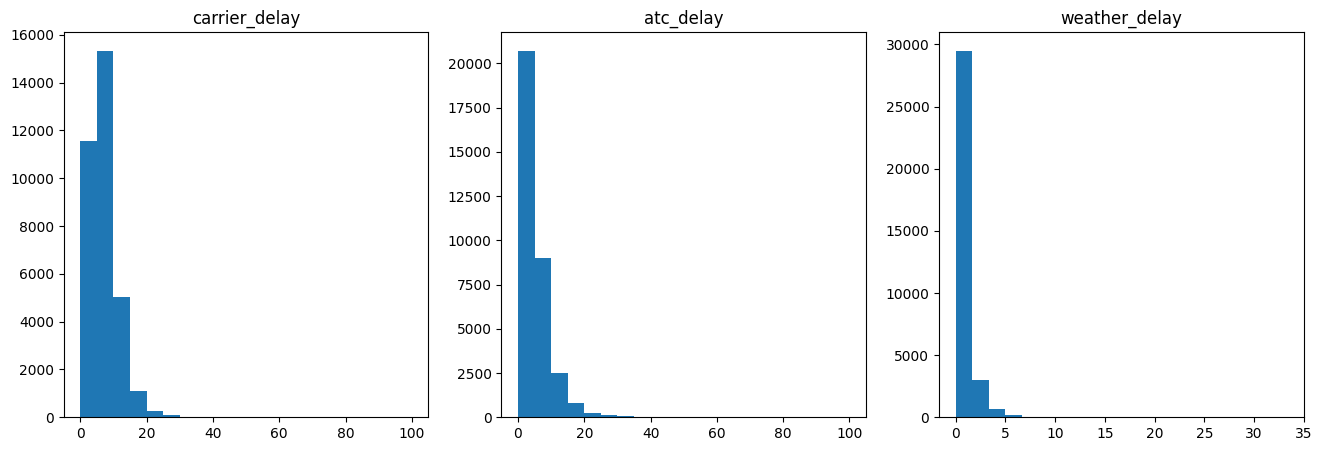

In [ ]:
#1. 히스토그램
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df['pct_carrier_delay'], bins=20)
ax2.hist(df['pct_atc_delay'], bins=20)
ax3.hist(df['pct_weather_delay'], bins=20)

ax1.set_title('carrier_delay')
ax2.set_title('atc_delay')
ax3.set_title('weather_delay')

plt.show()


지연요인별 도수가 차이가 있음.<br>
- 항공사지연요인은 첫번째 구간이 12천, 두번째구간이 15천 이다. <br>
- ATC 지연요인은 첫번째 구간이 2만으로 가장 높다.<br>
- 날씨 지연요인은 첫번째 구간이 3만으로 다른 요인들에 비해 높다.

In [ ]:
#2. 박스플롯
# - 전체, 항공사별 분석

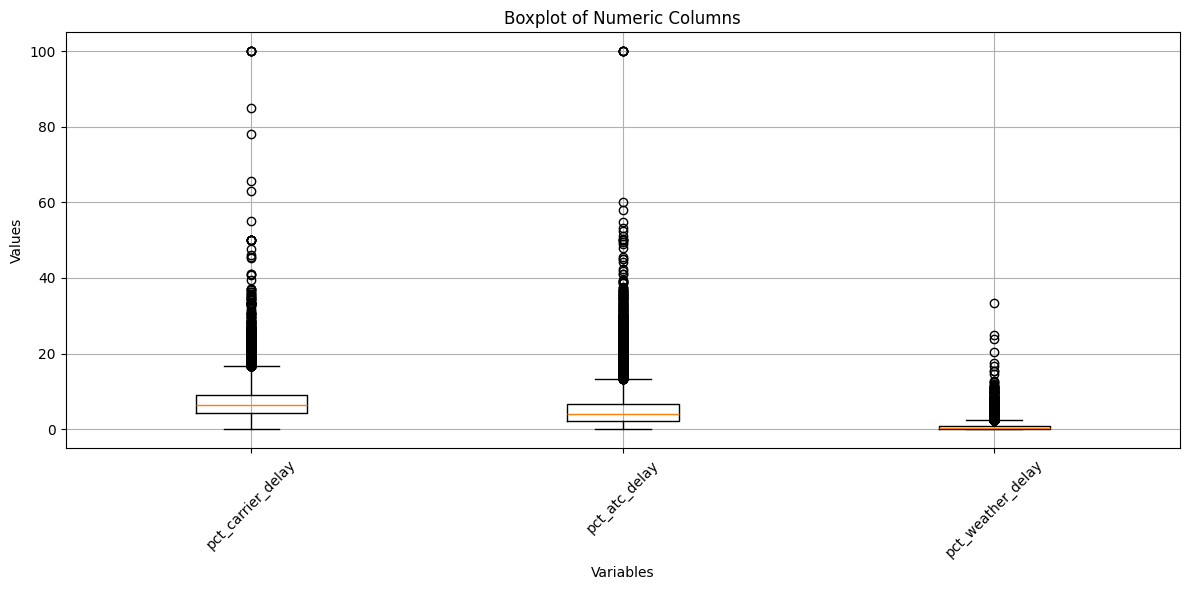

In [31]:
nu_df = df.select_dtypes(include='number')
# 박스플롯 그리기
plt.figure(figsize=(12, 6))
plt.boxplot(nu_df.values, tick_labels=nu_df.columns)

plt.title('Boxplot of Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

지연 유형별 중앙값, 사분위수, 이상치를 확인

1) 항공사 지연 : 20% 이상인 경우를 이상치로 판단, 그런데, 100에 육박하는 극단적인 지연율도 있다.
2) ATC 지연 : 항공사 지연보다 낮은 수준에서 이상치로 판단, 역시 100인 극단적인도 지연도 있으나 항공사지연요인보다 빈번하지 않다.
3) 날씨지연 : 중앙값, IQR 자체가 작다. 이상치가 20이상인 경우이고, 다른 요인들에 비해 상대적으로 빈번하진 않다.

항공사별 분석

C:\Users\Admin\AppData\Local\Temp\ipykernel_6136\4037424304.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grp_data, labels=labels)


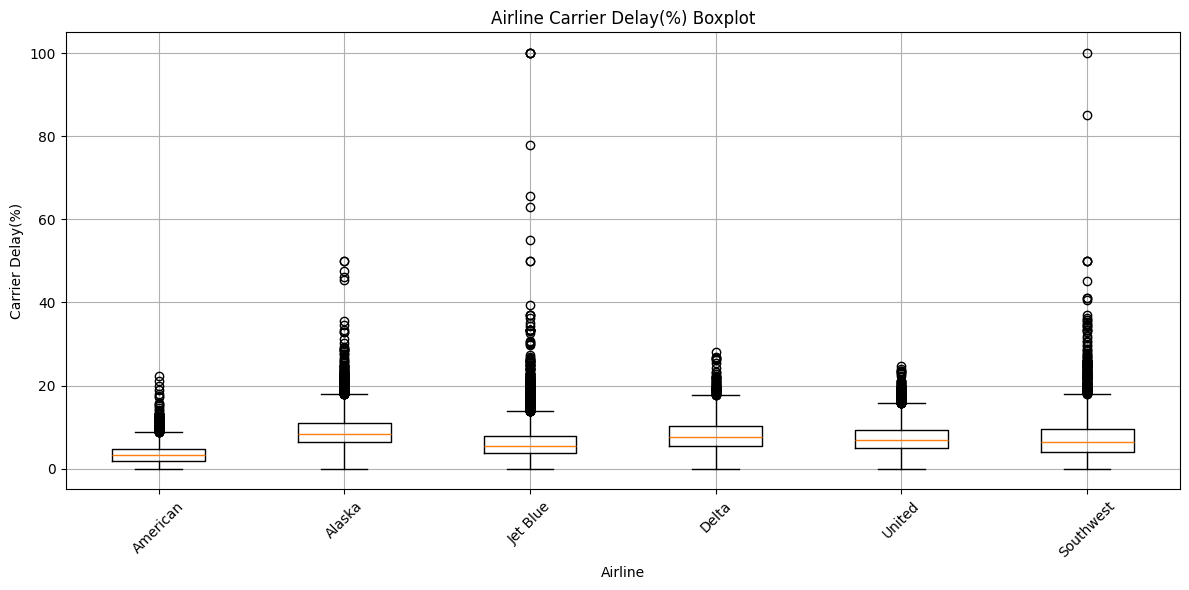

In [34]:
labels = df['airline'].unique()
grp_data = [  group['pct_carrier_delay'] for name, group in df.groupby('airline')]
#grp_data
# 박스플롯 그리기
plt.figure(figsize=(12, 6))
plt.boxplot(grp_data, labels=labels)

plt.title('Airline Carrier Delay(%) Boxplot')
plt.xlabel('Airline')
plt.ylabel('Carrier Delay(%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

항공사별로 항공사지연요인을 분석하면, <br>

- American 항공사가 지연수준이 낮은 편이다.
- Delta, United 항공사가 중앙값은 다른 항공사에 비해 크지 않으나, 이상치는 많이 보인다. <br>
- Alaska 가 전반적으로 이상치 발생율이 높은 편이고 비율도 크다.<br> 
- jet blue, southwest 의 이상치가 극단적이다. (100%)

In [ ]:
#3. 추가 분석
#분석결과

In [ ]:
#4. 상관관계 분석
#분석결과

In [ ]:
#5. 공분산 확인
#분석결과

# 분석 결과 정리

# 추가 : 다음 분석 방향 계획